In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
resume = pd.read_csv('/content/drive/MyDrive/NLP/UpdatedResumeDataSet.csv')

In [ ]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
print(resume.head())

print(resume.tail())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
    Category                                             Resume
957  Testing  Computer Skills: â¢ Proficient in MS office (...
958  Testing  â Willingness to accept the challenges. â ...
959  Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960  Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961  Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
resume['Category'].value_counts()


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

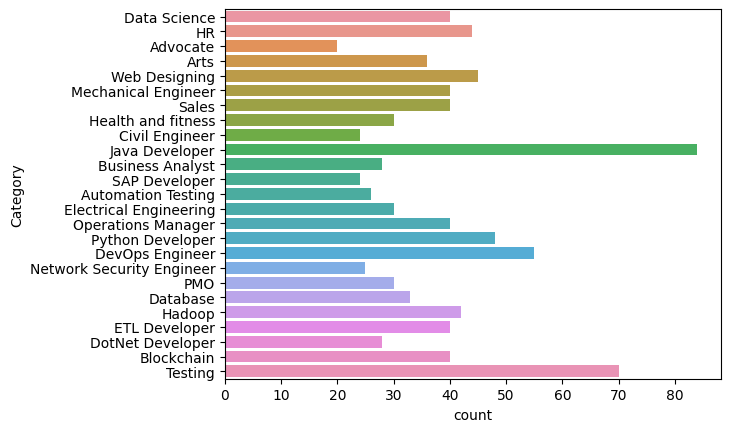

In [ ]:
sns.countplot(y="Category", data=resume)

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))


In [ ]:
print('--- Original resume ---')
print(resume['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [ ]:
# Printing the same resume after text cleaning
print('--- Cleaned resume ---')
print(resume['cleaned_resume'][0])

--- Cleaned resume ---
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assis

In [ ]:
#Obtaining the most common words

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


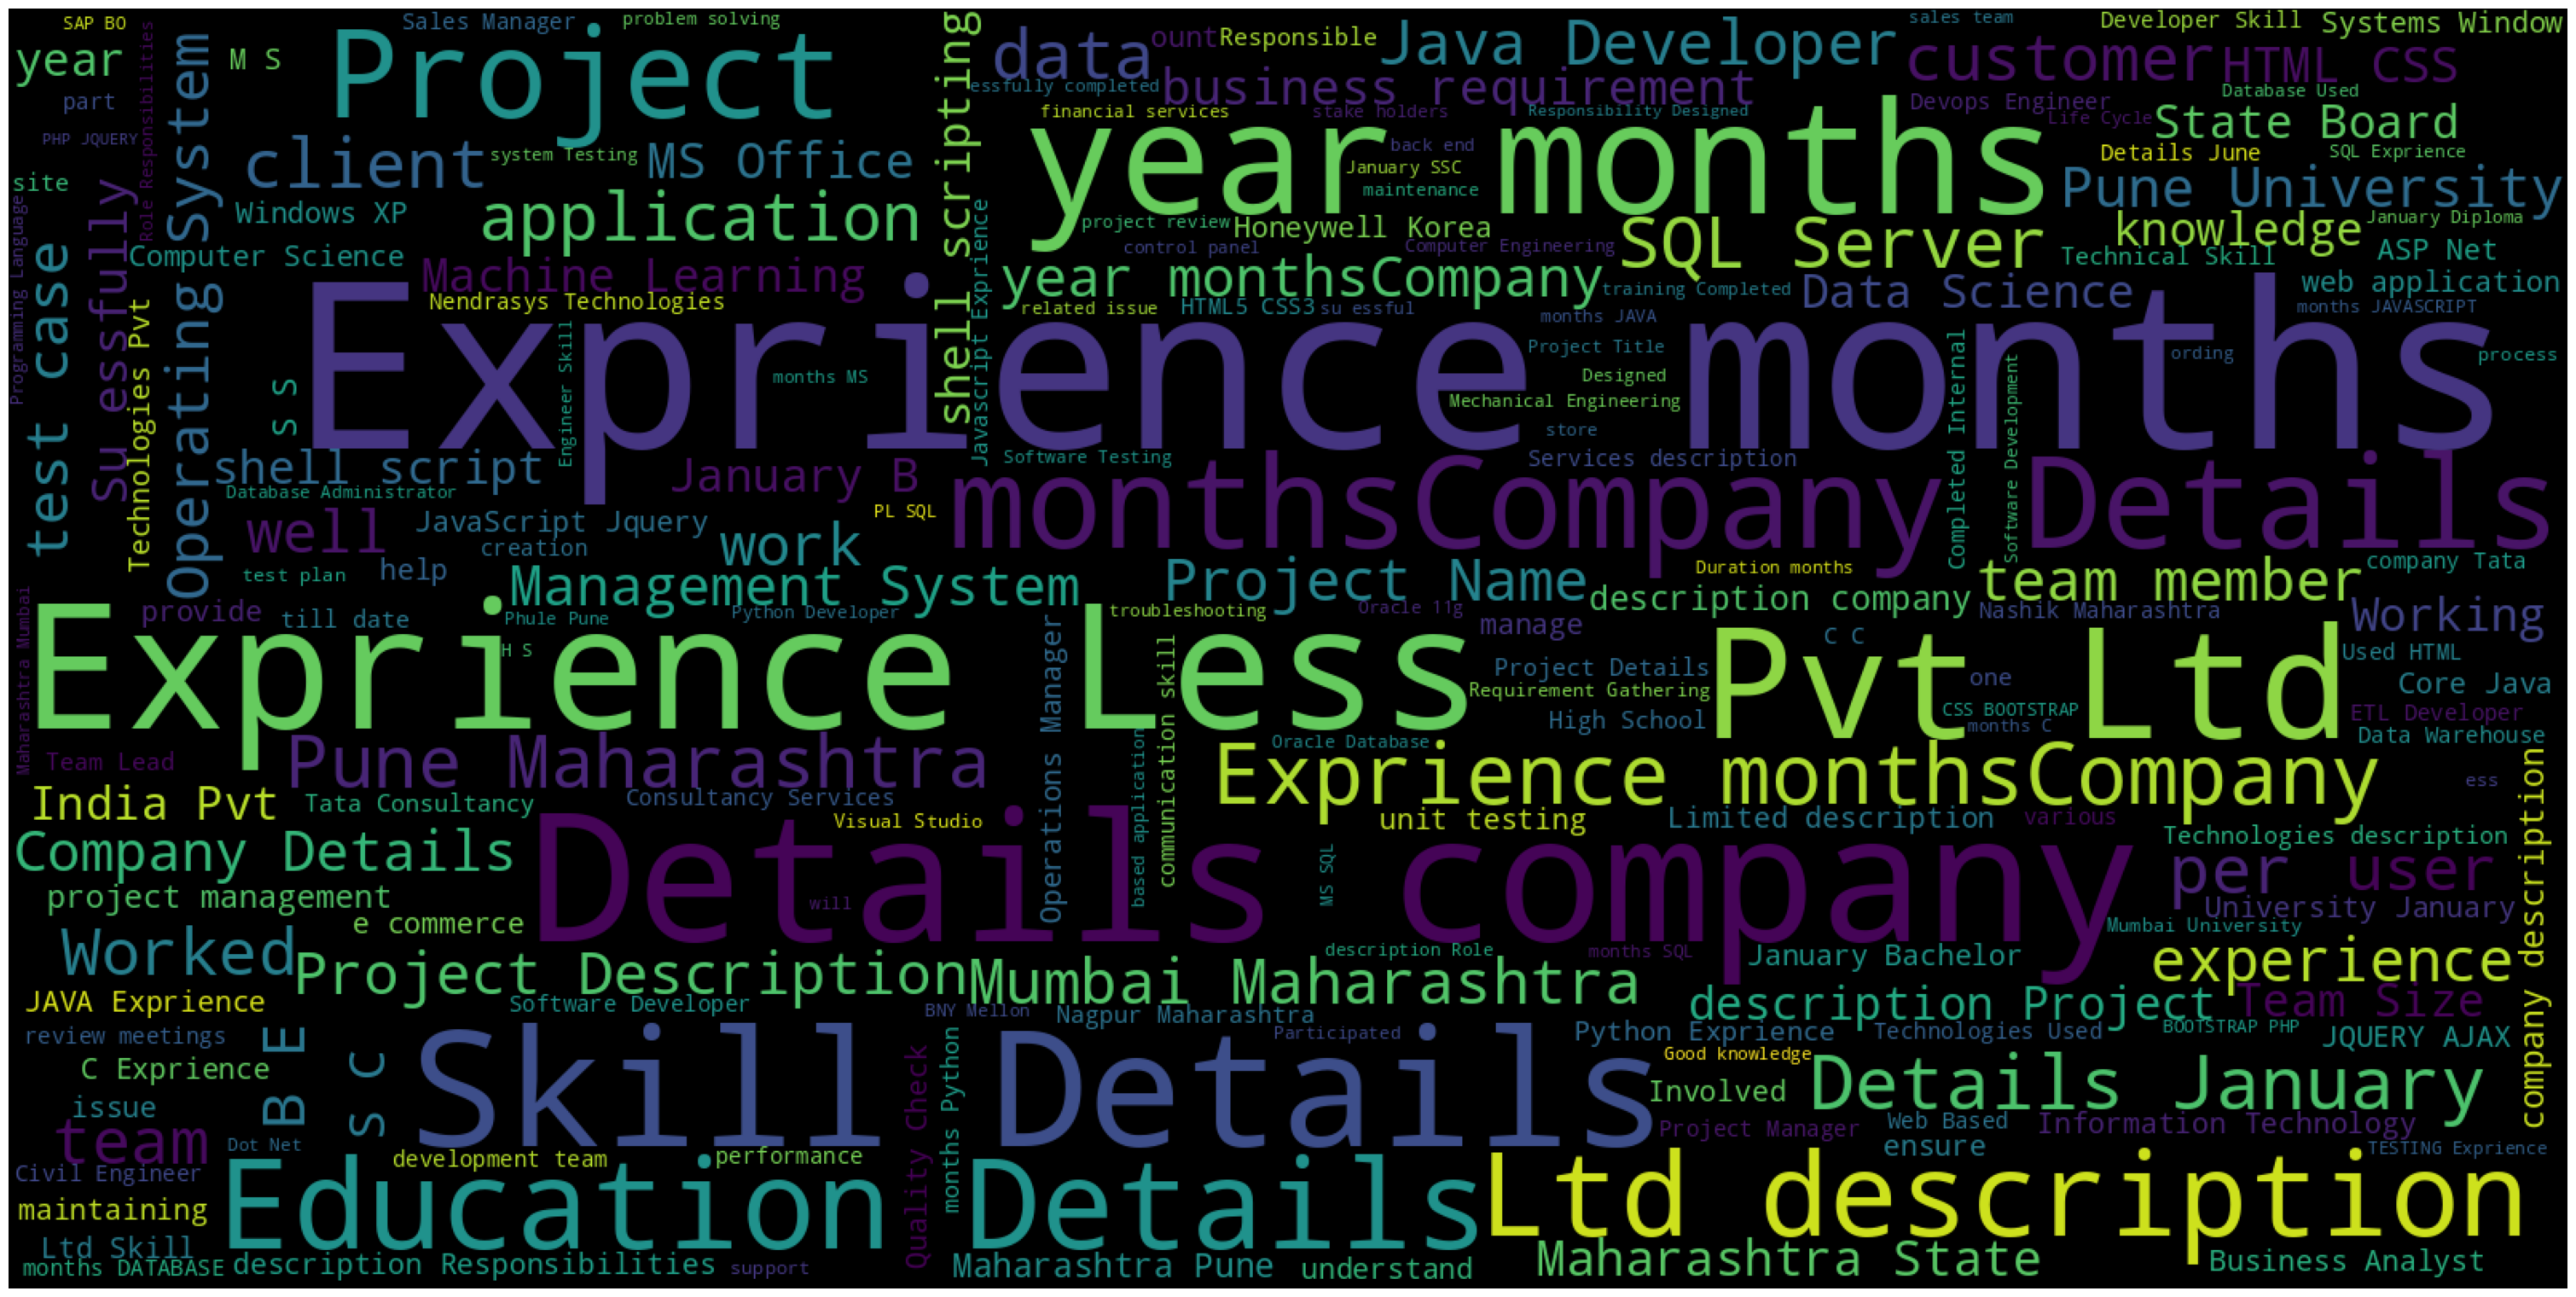

In [ ]:
#Visualising most common words with Wordcloud
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

In [ ]:
from sklearn.utils import shuffle

# Get features and labels from data and shuffle
features = resume['cleaned_resume'].values
original_labels = resume['Category'].values
labels = original_labels[:]

for i in range(len(resume)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

Education Details February 2006 to February 2006 TYBCOM Commerce mumbai Business Analyst Business Analyst Skill Details Company Details company Motilal Oswal description Business Analyst Handling IT Operation for Institutional Equities Maintain Daily MIS in Excel for CAG Research Derivative Sales team Preparing Auto Dashboard For Research Sales Trading team Working on Excel Macro to Create Innovative Report Working on Block Related Data Working on BD Fund from different GEO Working on Investors Corporate Meeting to track Corporate Block Fund Interest in Sector company FSS description Project Description Maintain and prepare cash indent cash report cash position and cash planning Responsibilities Maintain Daily MIS in excel Provide complete information about MIS ATM Maintain and prepare cash indent cash report cash position cash planning Co ordinate with BANK CASH DEPA MENT Co ordinate with custodians DEGREE COURSE YEAR of PASSING GRADE INSTITUTE UNIVERSITY BOARD PERCENTAGE company ANGE

In [ ]:
# Split into train and test
train_split = 0.8
train_size = int(train_split * len(resume))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

769
193


In [ ]:
#tokenize features and labels

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())[:20]))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20}


In [ ]:
# Tokenize label data
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'datascience': 8, 'etldeveloper': 9, 'sales': 10, 'operationsmanager': 11, 'mechanicalengineer': 12, 'blockchain': 13, 'arts': 14, 'database': 15, 'pmo': 16, 'electricalengineering': 17, 'healthandfitness': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'sapdeveloper': 23, 'civilengineer': 24, 'advocate': 25}


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  55   15 1847  816    5 1847  816 5167  320  108   33  457   33  457
   41   15   10   15   10 5168 5169   14   33  457  119   60  630    7
 1605 3181  184  208  554    6  312    7 5170  411 5171   57   21  210
  800  757    7  411   57 2803   21   73   16  312 5172    5  279 1825
  146   73   16 2159  152   18   73   16 5173 3358   30  114 3680   73
   16 5174  435  524    5  342  435 2159 3358 1217    6 1123   10 5175
   14   12   14  184    2  525  749 3359  749  146  749  484    2  749
  240   56  184  208  554    6  312  169  293  109  247  554 2054  184
    2  525  749 3359  749  146  749  484  749  240  249 1375    9  231
  749 5176 5177  249 1375    9 5178 1376  725   28    4 2903 2639  277
   67  235 5179   10 5180 5181   14  176  766  101  785 5182   56  119
   21    4 1039   98 1961   21  232  184  208  554    6  312    4   21
 1677  184    2  525 5183 1360  594   16 5184 3360   43    7 2407    4
  577 1102 3360   58    5  114  890  458    9 1606  169  293  109  247
  324 

In [ ]:
#Train a sequential model

# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [ ]:
# Train the neural network
num_epochs = 10

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/10
25/25 - 16s - loss: 3.2220 - accuracy: 0.1105 - val_loss: 3.1153 - val_accuracy: 0.1088 - 16s/epoch - 646ms/step
Epoch 2/10
25/25 - 10s - loss: 2.9109 - accuracy: 0.1352 - val_loss: 2.7546 - val_accuracy: 0.2176 - 10s/epoch - 412ms/step
Epoch 3/10
25/25 - 8s - loss: 2.4896 - accuracy: 0.2354 - val_loss: 2.3951 - val_accuracy: 0.1813 - 8s/epoch - 324ms/step
Epoch 4/10
25/25 - 9s - loss: 2.1164 - accuracy: 0.3823 - val_loss: 1.9671 - val_accuracy: 0.3472 - 9s/epoch - 372ms/step
Epoch 5/10
25/25 - 10s - loss: 1.6265 - accuracy: 0.5436 - val_loss: 1.5129 - val_accuracy: 0.5803 - 10s/epoch - 381ms/step
Epoch 6/10
25/25 - 8s - loss: 1.2002 - accuracy: 0.6658 - val_loss: 1.2243 - val_accuracy: 0.6269 - 8s/epoch - 308ms/step
Epoch 7/10
25/25 - 10s - loss: 0.9742 - accuracy: 0.7347 - val_loss: 1.0770 - val_accuracy: 0.6891 - 10s/epoch - 390ms/step
Epoch 8/10
25/25 - 14s - loss: 0.8248 - accuracy: 0.7802 - val_loss: 0.9585 - val_accuracy: 0.8187 - 14s/epoch - 550ms/step
Epoch 9/10
25/

In [ ]:
print(test_features[5])
print(test_labels[5])

Computer skills Yes SQL knowledge yes Unix knowledge yes Data warehouse knowledge yes Ab intio yee MY HOBBIES Playing Cricket football Reading books Visiting new places Travelling DECLARATION I hereby declare that the above mentioned information is factual and correct up to the best of my knowledge and belief Date 27 01 2019 MR MANISH PRABHAKAR PATIL Place MUMBAI Education Details June 2014 to June 2015 Bachelor s Electronics and Telecommunication A C Patil college of Engineering January 2009 to January 2011 Engineering Navi Mumbai Maharashtra Bharati vidyapeeth January 2008 H S C Mumbai Maharashtra Khalsa college ETL Informatica Developer ETL DEVELOPER Skill Details ETL Exprience Less than 1 year months Data Warehouse Exprience Less than 1 year months Datastage Exprience Less than 1 year monthsCompany Details company Reliance Infocomm description I havevbeen working as ETL Developer in reliance industries in India for the past 3years I have very good knowledge of Informatica and SQL a

In [ ]:
print(test_features[8])
print(test_labels[8])

AREA OF EXPE ISE PROFILE Around 10 plus years proven experience with best global brand Wipro with below expertise PMO ITIL Management Process Improvements Project Process Audits Planning Scheduling Effort Issue Risk Tracking Risk Issue Management SLA Management Workforce staffing Resource Management Transition Operations management SKILLS Project Management Tools CA Clarity Visio and Office ITIL Incident management Recruitment and workforce management Technical SAP HR MRS CPRO Confluence Microsoft Office Word PowerPoint Excellent knowledge hands on experience in advanced MS Excel Knowledge on MS Project Sharepoint Reporting Ticket Tool Xtraction CA Service Desk I Tracker Education Details MBA HR and Finance Bengaluru Karnataka RKIMS College Senior Executive PMO Senior Executive PMO Consultant Skill Details OPERATIONS Exprience 125 months STAFFING Exprience 125 months HR Exprience 79 months PMO Exprience 84 monthsCompany Details company Ensono LLP description Roles Responsiblites Respon

In [ ]:
#determining test score and accuracy
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7/7 [==============================] - 1s 108ms/step - loss: 0.4768 - accuracy: 0.9119
Test Score: 0.47675821185112
Test Accuracy: 0.9119170904159546


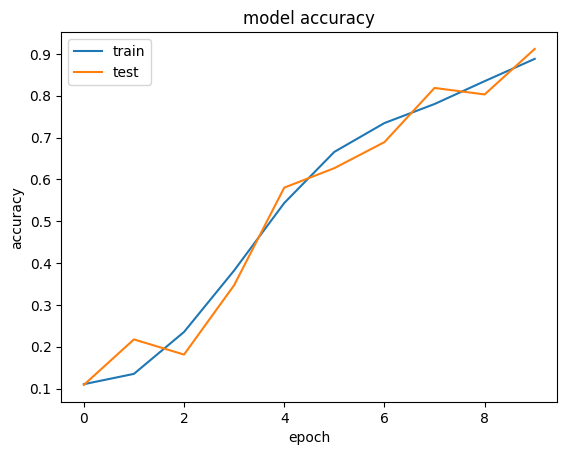

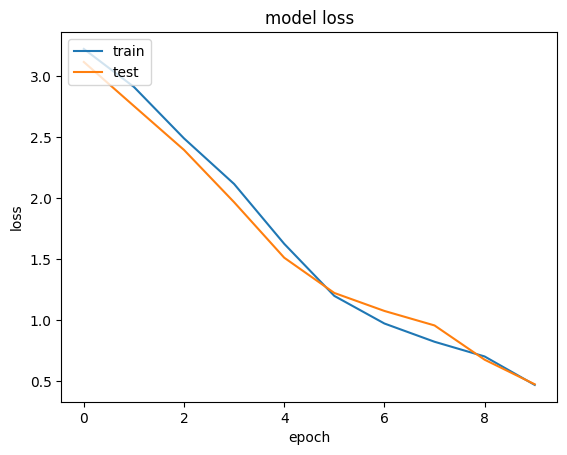

In [ ]:
#Visualising the model accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

7/7 [==============================] - 2s 61ms/step


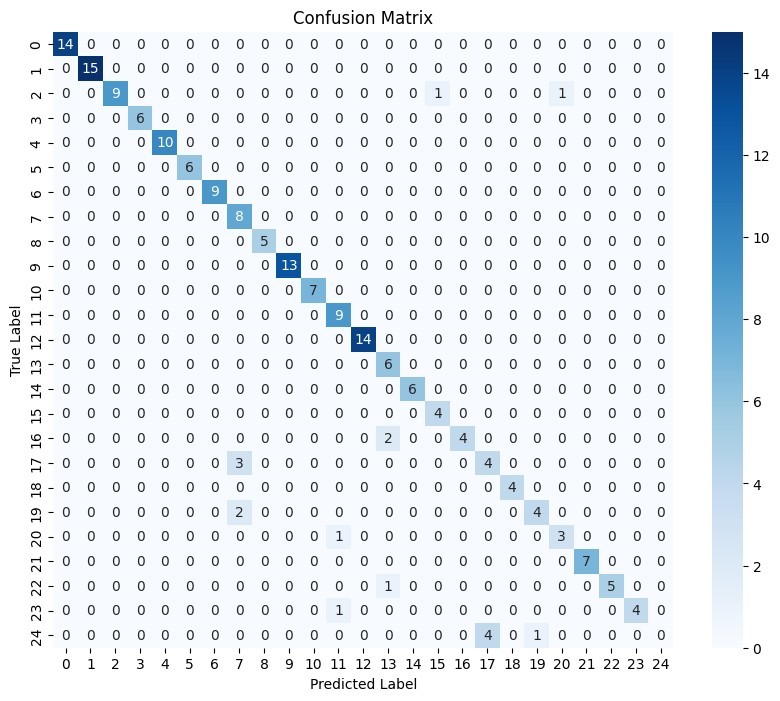

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
y_pred = model.predict(test_feature_padded)

# Convert prediction probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(test_label_sequences, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Let's assume that your model is called 'model'
print('LSTM Model Evaluation')
print("-"*80)
# Here, you should convert the predictions to the appropriate format using np.argmax if your model outputs probabilities
predictions = model.predict(test_feature_padded)
predictions = np.argmax(predictions, axis=1)
print(classification_report(test_label_sequences, predictions))
print("*"*100)
print(" ")

LSTM Model Evaluation
--------------------------------------------------------------------------------
7/7 [==============================] - 1s 142ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         9
           8       0.62      1.00      0.76         8
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00         7
          12       0.82      1.00      0.90         9
          13       1.00      1.00      1.00        14
          14       0.67      1.00      0.80         6
          15       1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("LSTM.h5")

In [ ]:
model2 = tf.keras.models.load_model('/content/LSTM.h5')